In [1]:
# on importe les différentes librairies 
import numpy as np 
import tsfresh as ts 
import pandas as pd 
from tsfresh import select_features
import os 
from matrixprofile import *
import matplotlib.pyplot as plt 
import shutil

In [5]:
# on construie le dictionnaire avec clefs=classes et values = le numéro des images appartenant à cette classe 
elements = os.listdir("../classes")
Mat = {}
for element in elements :
    new_mat = []
    dirs = os.listdir("../classes/"+element)
    for dir in dirs :
        if dir[-3 :] == "png" :
            try :
                new_mat.append(int(dir.replace(".png","")))
            except Exception as e :
                pass 
    Mat[int(element.replace("class_",""))] = new_mat


In [35]:
# on teste qu'il n'y a pas de classe supérieur à 18 ou inférieur à 0 ni d'élément non entier à l'intérieur du dictionnaire
keys = [element for element in Mat.keys()]
values = [element for element in Mat.values()]
try :
    assert np.max(keys) < 19
    assert np.min(keys) > 0
    sum = 0
    for key in keys :
        assert all(isinstance(x, int) for x in values[key-1])== True
        sum += len(values[key-1])
    assert sum == 779
except Exception as e :
    print("Test failed")
    raise e 
print("Test succesfull")

Test succesfull


In [32]:
# on construit la fonction qui permet de tracer les dfférents pattern sur le signal (disponible sur le github associé au papier matrix profile)
def plot_motifs(mtfs, labels, ax):
    colori = 0
    colors = 'rgbcm'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + m,len(x)-1) for s in starts]
        ax.plot(starts, x[starts],  c +'o',  label=l)
        ax.plot(ends, x[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+m),x[nn:nn+m], c , linewidth=2)
        colori += 1

    ax.plot(x, 'k', linewidth=1, label="data")
    ax.legend()

In [ ]:
# on superpose les trois signaux à savoir le signal / la matrice profile /les différents pattern obtenus sur le signal

for i in range(1,797):
    try :
        x = np.array(pd.read_csv(str(i)+".csv")["x"])
        m=50
        mp = matrixProfile.stomp(x,m)
        mtfs ,motif_d  = motifs.motifs(x, mp, max_motifs=10)
        fig, (ax1, ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
        ax1.plot(x)
        ax1.title.set_text("Signal réel")
        ax2.plot(mp[0])
        ax2.title.set_text("matrix profile")
        plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
        ax3.title.set_text('Motifs')
        plt.savefig("matrix_profile_"+str(i)+"png.png", bbox_inches='tight')
    except Exception as e :
        print("Error with ",str(i))

[]

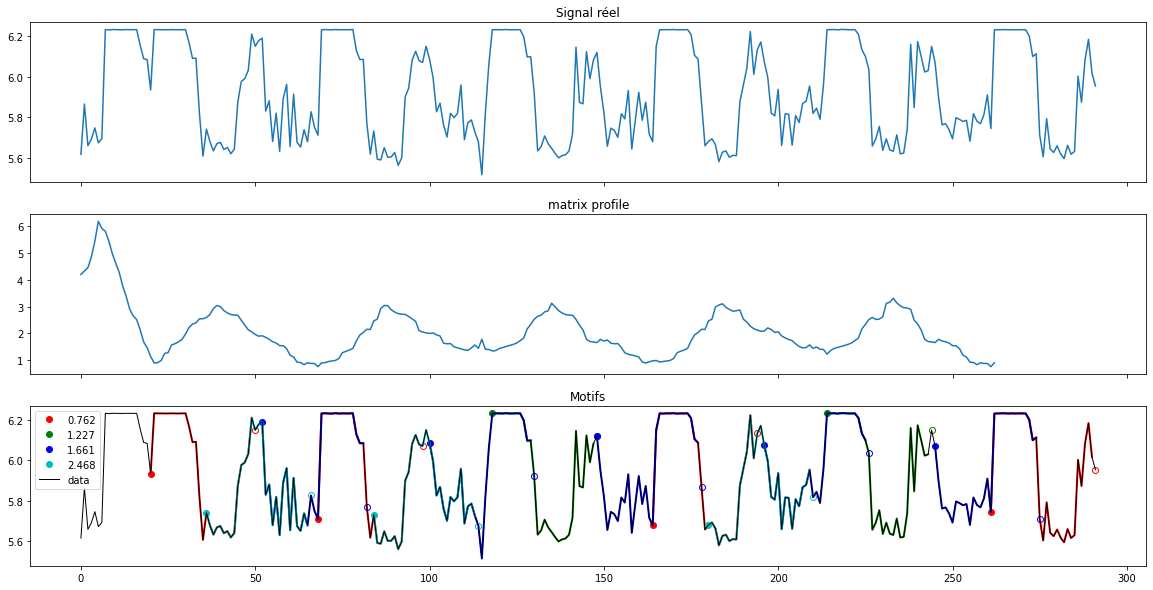

In [44]:
# exemple pour un signal 
x = np.array(pd.read_csv("18.csv")["x"])
m=30
mp = matrixProfile.stomp(x,m)
mtfs ,motif_d  = motifs.motifs(x, mp, max_motifs=10)
fig, (ax1, ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(x)
ax1.title.set_text("Signal réel")
ax2.plot(mp[0])
ax2.title.set_text("matrix profile")
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.title.set_text('Motifs')
plt.plot()